# EDA on Insurance Claim 

This is Sample Insurance Claim Prediction Dataset which based on Medical Cost Personal Datasets1 and is available on the Kaggle

## Dataset Attributes

    age : age of policyholder
    sex: gender of policy holder (female=0, male=1)
    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, 
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25
    steps: average walking steps per day of policyholder
    children: number of children / dependents of policyholder
    smoker: smoking state of policyholder (non-smoke=0; smoker=1)
    region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
    charges: individual medical costs billed by health insurance
    insuranceclaim: yes=1, no=0

In [1]:
#Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [2]:
insurance=pd.read_csv('insurance3r2.csv',sep=',')
insurance.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [3]:
insurance.shape

(1338, 9)

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [45]:
insurance.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


## Data Visualization

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\d

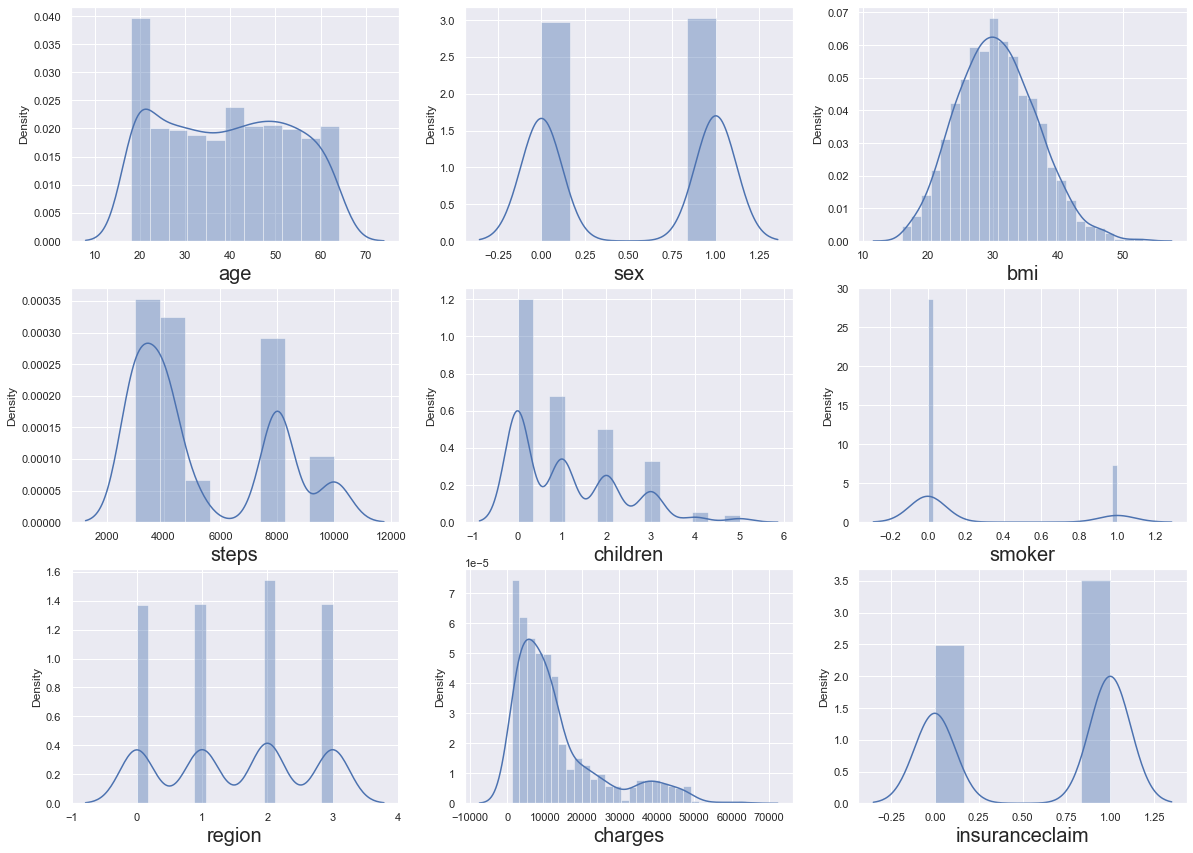

In [5]:
# let's see how data is distributed for every column
sns.set(style='darkgrid')
plt.figure(figsize=(20,25))#, facecolor='white'
plotnumber = 1

for column in insurance.columns:
    if plotnumber<=9 :     # as there are 14 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(insurance[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Observations
    1. Ideally BMI must be between 18.5 to 25, but in the dataset mean BMI is around 30, minimum BMI is 15 and maximum 
    BMI is 53
    2. Some of the policy holder has paid charges more than 40K
    3. Mean age of the policy holder is 39, maximum is 63 and minimum is 18 

## Data Cleaning

In [6]:
#Datacopy=data.copy()
#Datacopy.rename(columns={'male': 'Sex'}, inplace = True)
#Datacopy['Sex'] = Datacopy['Sex'].replace({0:'Female',1:'Male'})
#sns.countplot(x="Sex", hue="TenYearCHD", data=Datacopy)
#plt.show()

In [7]:
insurance_new=insurance.copy()
insurance_new.rename(columns={'insuranceclaim': 'claim'}, inplace = True)
insurance_new['sex'] = insurance_new['sex'].replace({0:'Female',1:'Male'})
insurance_new['smoker'] = insurance_new['smoker'].replace({0:'No',1:'Yes'})
insurance_new['region'] = insurance_new['region'].replace({0:'northeast',1:'northwest',2:'southeast',3:'southwest'}) #northeast=0, northwest=1, southeast=2, southwest=3

In [8]:
insurance_new['claim'] = insurance_new['claim'].replace({0:'No',1:'Yes'})

In [9]:
insurance_new.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'claim'],
      dtype='object')

    Columns of sex, smoker and region has been changed 

In [49]:
insurance_new.head()

,age,sex,bmi,steps,children,smoker,region,charges,claim
0,19,Female,27.900,3009,0,Yes,southwest,16884.92400,Yes
1,18,Male,33.770,3008,1,No,southeast,1725.55230,Yes
2,28,Male,33.000,3009,3,No,southeast,4449.46200,No
3,33,Male,22.705,10009,0,No,northwest,21984.47061,No
4,32,Male,28.880,8010,0,No,northwest,3866.85520,Yes


In [50]:
insurance_new.shape

(1338, 9)

In [51]:
insurance_new.describe()

,age,bmi,steps,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,5328.623318,1.094918,13270.422265
std,14.049960,6.098187,2453.643236,1.205493,12110.011237
min,18.000000,15.960000,3000.000000,0.000000,1121.873900
25%,27.000000,26.296250,3008.000000,0.000000,4740.287150
50%,39.000000,30.400000,4007.000000,1.000000,9382.033000
75%,51.000000,34.693750,8004.000000,2.000000,16639.912515
max,64.000000,53.130000,10010.000000,5.000000,63770.428010


In [52]:
insurance_new.isnull().sum()

age         0
sex         0
bmi         0
steps       0
children    0
smoker      0
region      0
charges     0
claim       0
dtype: int64

In [53]:
insurance_new.duplicated().sum()

0

Dataset does not contain any null and duplicate values

In [83]:
print(insurance_new['sex'].value_counts())
print('\n')
print(insurance_new['children'].value_counts())
print('\n')
print(insurance_new['smoker'].value_counts())
print('\n')
print(insurance_new['region'].value_counts())
print('\n')
print(insurance_new['claim'].value_counts())


Male      676
Female    662
Name: sex, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


No     1064
Yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Yes    783
No     555
Name: claim, dtype: int64


C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\d

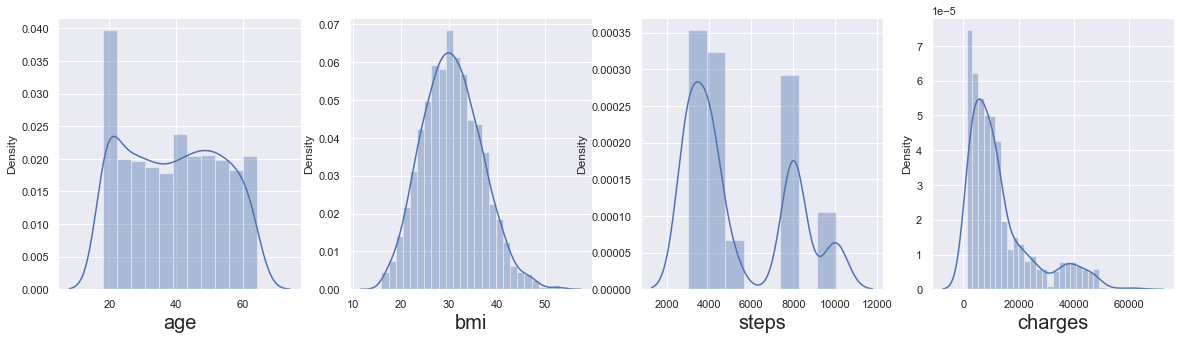

In [15]:
# let's see how data is distributed for every column
sns.set(style='darkgrid')
x=insurance_new.drop(columns=['sex','children', 'smoker', 'region','claim'])
plt.figure(figsize=(20,5))#, facecolor='white'
plotnumber = 1

for column in x:
    if plotnumber<=4 :     # as there are 14 columns in the data
        ax = plt.subplot(1,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

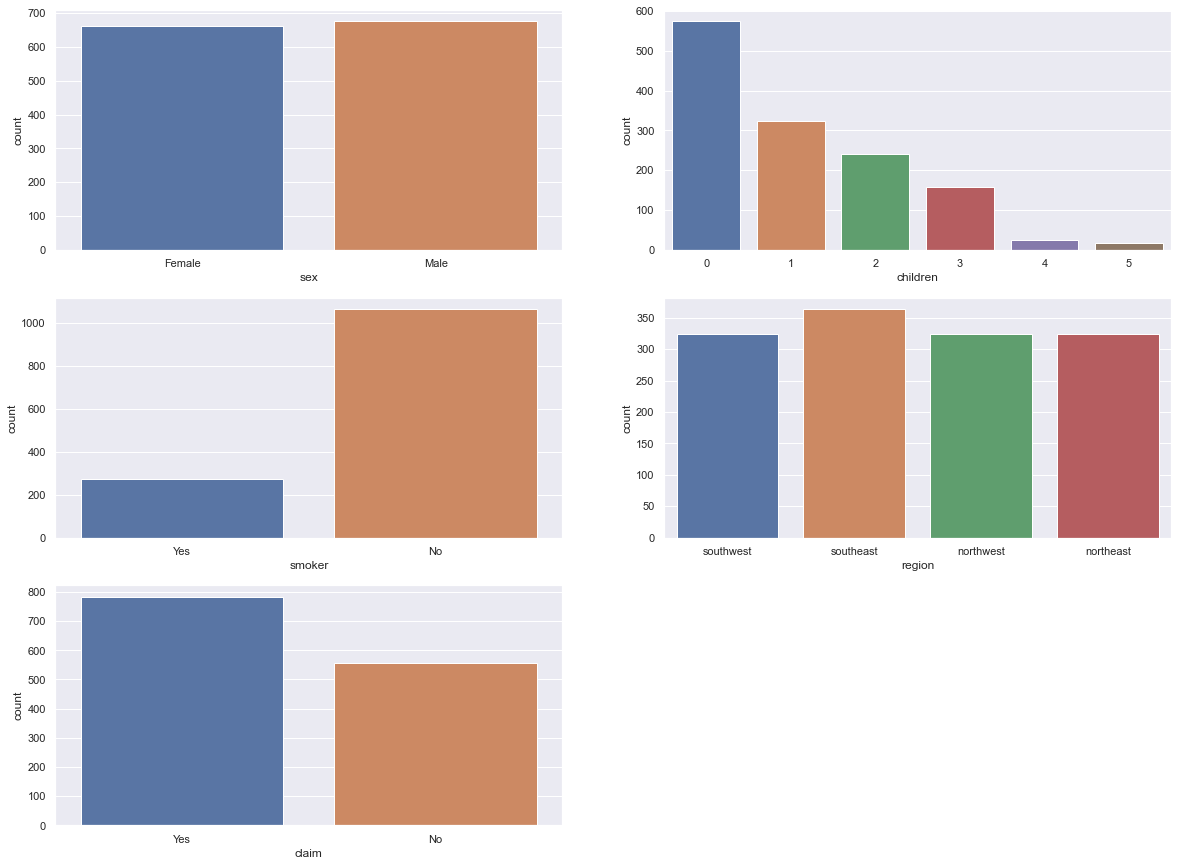

In [16]:
cat_cols = ['sex','children', 'smoker', 'region','claim']
i=0
while i < 5:
    fig = plt.figure(figsize=[20,15])
    
    plt.subplot(3,2,1)
    sns.countplot(x=cat_cols[i],data=insurance_new)
    i += 1
    plt.subplot(3,2,2)
    sns.countplot(x=cat_cols[i],data=insurance_new)
    i += 1
    plt.subplot(3,2,3)
    sns.countplot(x=cat_cols[i],data=insurance_new)
    i += 1
    plt.subplot(3,2,4)
    sns.countplot(x=cat_cols[i],data=insurance_new)
    i += 1
    plt.subplot(3,2,5)
    sns.countplot(x=cat_cols[i],data=insurance_new)
    i += 1
    plt.show()

## Observations
    1. Most of the policy holders are having less than 3 childrens
    2. In dataset, most of the policy holders are non-smoker (around 1064)
    3. More policy holders are from southeast region of the US (around 364)
    4. Around 783 policy holders have filed the claim 

<AxesSubplot:xlabel='sex', ylabel='count'>

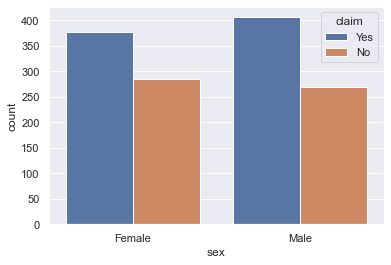

In [17]:
sns.countplot(x='sex',hue='claim',data=insurance_new)

Most of the claims are filed by the male policy holders

<AxesSubplot:xlabel='children', ylabel='count'>

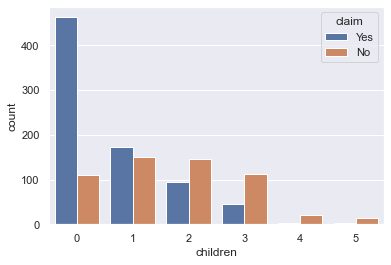

In [18]:
sns.countplot(x='children',hue='claim',data=insurance_new)

Policy holders with no children have filed the most claims

<AxesSubplot:xlabel='smoker', ylabel='count'>

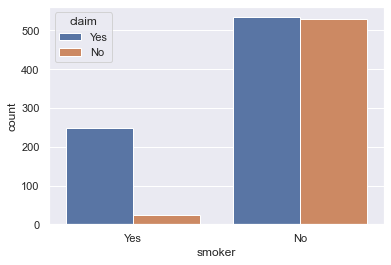

In [19]:
sns.countplot(x='smoker',hue='claim',data=insurance_new)

<AxesSubplot:xlabel='region', ylabel='count'>

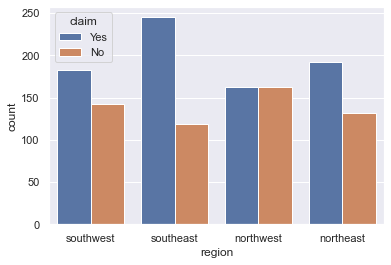

In [20]:
sns.countplot(x='region',hue='claim',data=insurance_new)

Most of the claims are filed from southeast region

<AxesSubplot:xlabel='age', ylabel='count'>

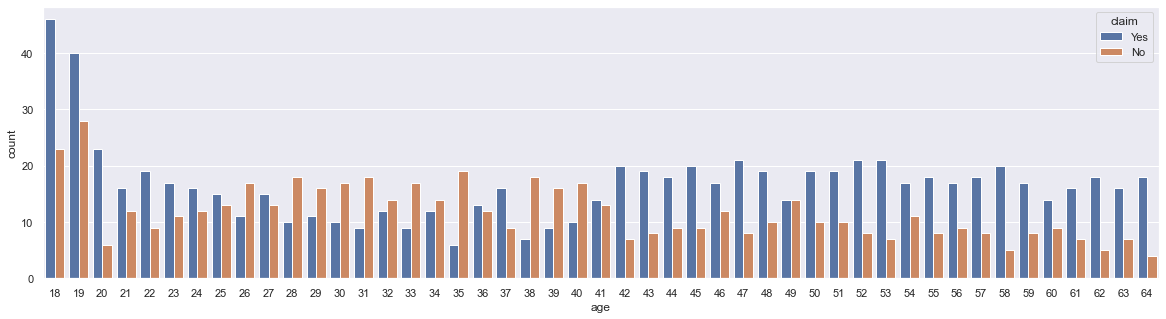

In [21]:
plt.figure(figsize=[20,5])
sns.countplot(x='age',hue='claim',data=insurance_new)

Most of the claims are filed by the policy holder with age range of 18 to 20 and 42-64

<AxesSubplot:xlabel='age', ylabel='count'>

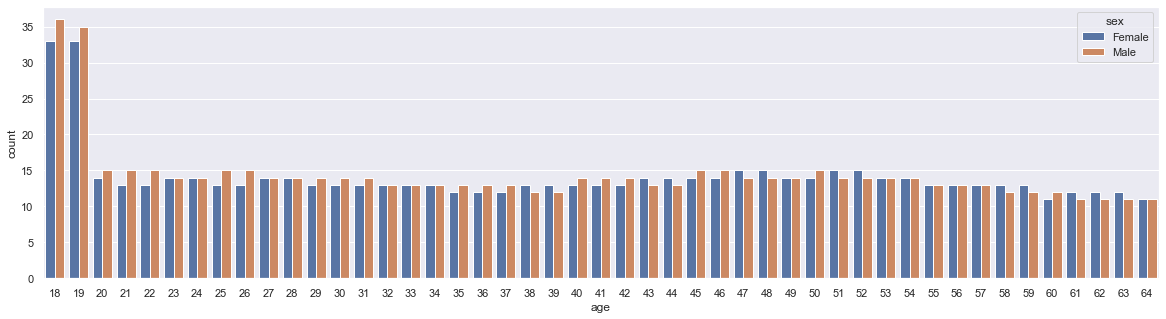

In [22]:
plt.figure(figsize=[20,5])
sns.countplot(x='age',hue='sex',data=insurance_new)

<AxesSubplot:xlabel='region', ylabel='count'>

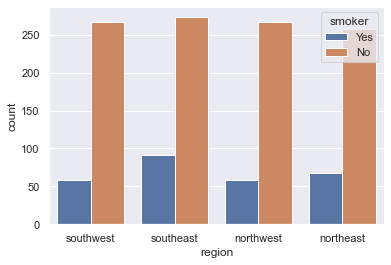

In [54]:
sns.countplot(x='region',hue='smoker',data=insurance_new)

Most of the smokers in a dataset are from southeast region

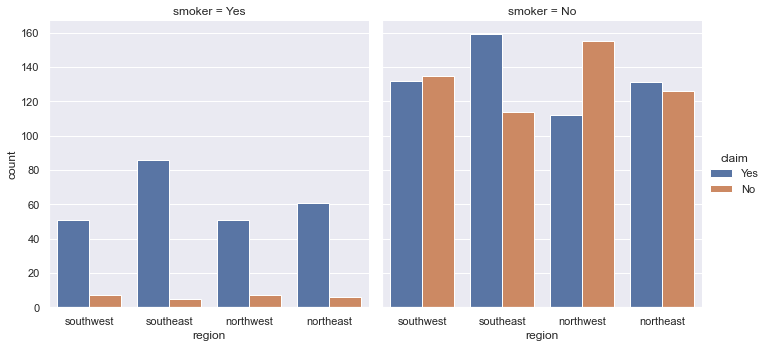

In [23]:
sns.catplot(x="region", hue="claim", col="smoker",data=insurance_new, kind="count");

Most of the claims are from southeast region

<AxesSubplot:xlabel='sex', ylabel='count'>

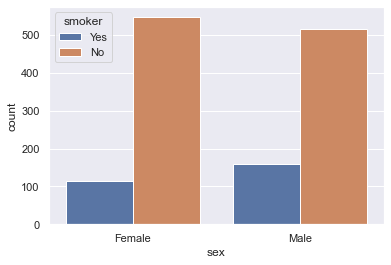

In [56]:
sns.countplot(x='sex',hue='smoker',data=insurance_new)

Quantity of male smokers is more than female smokers

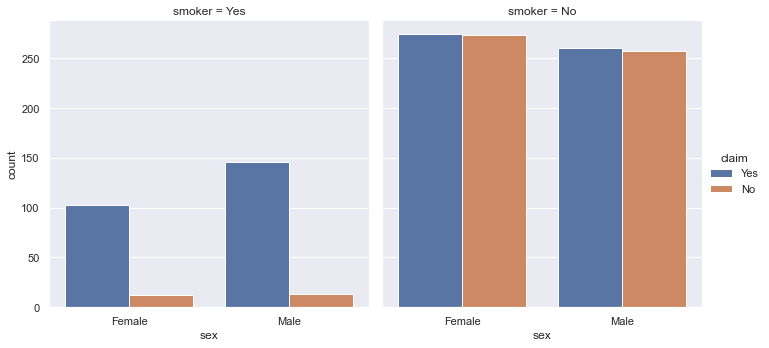

In [24]:
sns.catplot(x="sex", hue="claim", col="smoker",data=insurance_new, kind="count");

More claims are filed by the male smoker than the female smoker

<AxesSubplot:>

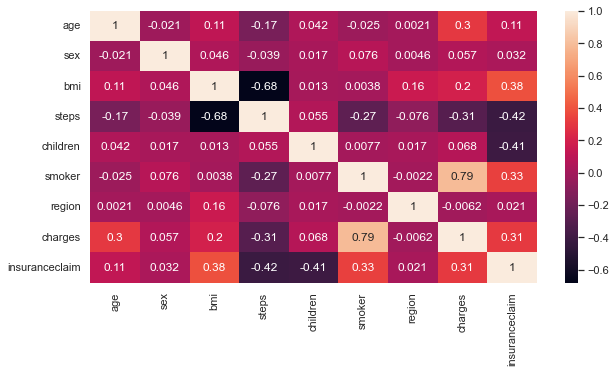

In [26]:
plt.figure(figsize=[10,5])
sns.heatmap(insurance.corr(),annot=True,fmt='.2g')

## Observations
    1. Age and charges are highly correlated
    2. BMI shows high correlation with the charges and the claims
    3. Steps and BMI shows negative correlation
    4. Smoker and charges shows high positive correlation

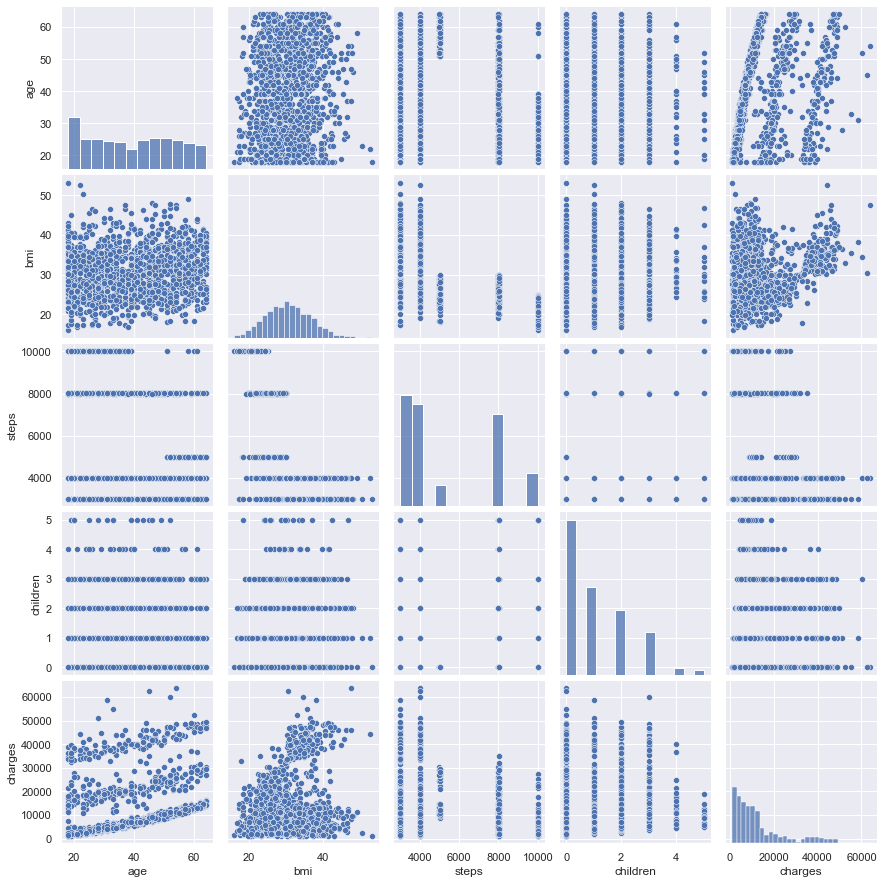

In [27]:
sns.pairplot(insurance_new)

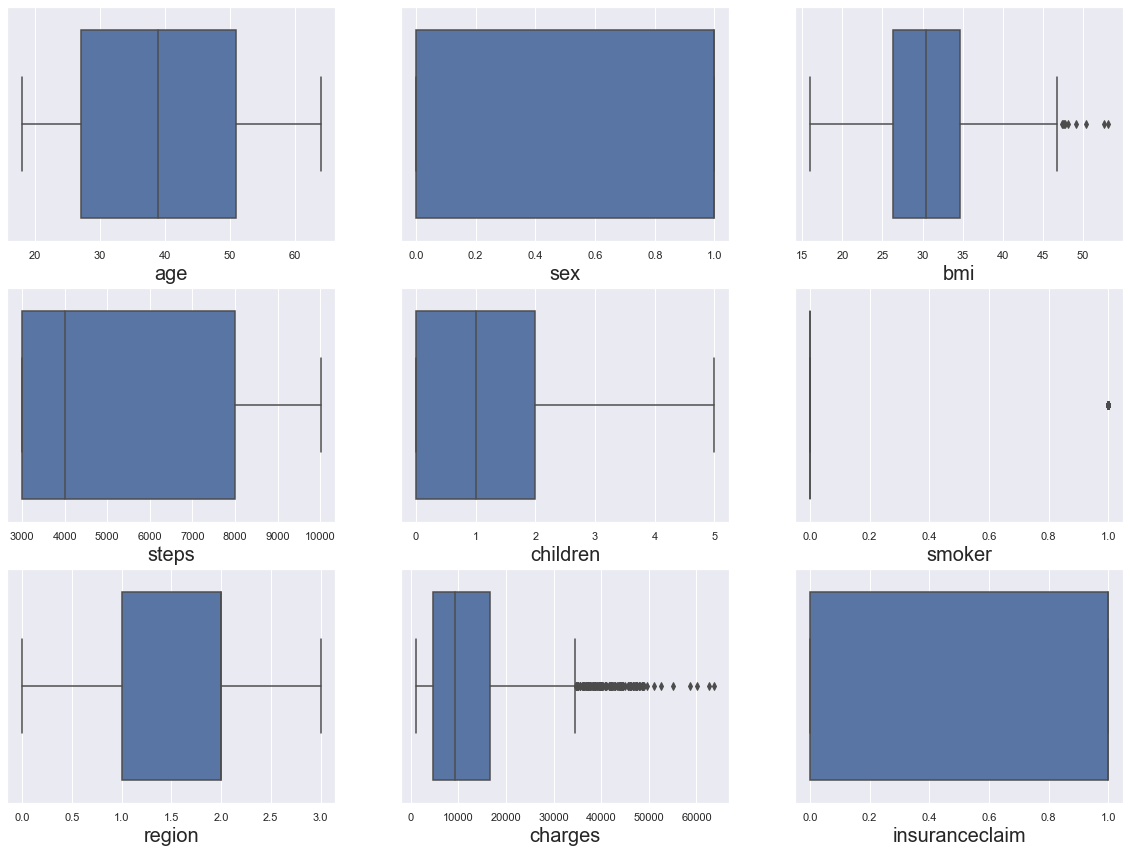

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in insurance.columns:
    if plotnumber<=9 :     # as there are 14 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(x=insurance[column],data=insurance)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

    1. Age range of the policy holders are from 27 to 51
    2. BMI range of the policy holders are from 26 to 34 which is higher than the ideal BMI and it has outliers
    3. Average steps count is 4000
    4. Average charges range is from 5 to 16k and it has outliers  

<AxesSubplot:xlabel='sex', ylabel='bmi'>

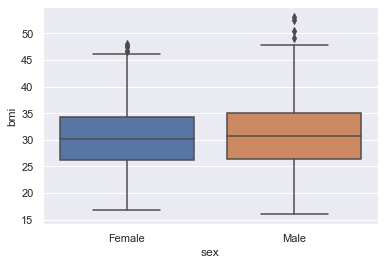

In [29]:
sns.boxplot(x='sex',y='bmi',data=insurance_new)

Found large average BMI index in male policy holder

<AxesSubplot:xlabel='sex', ylabel='charges'>

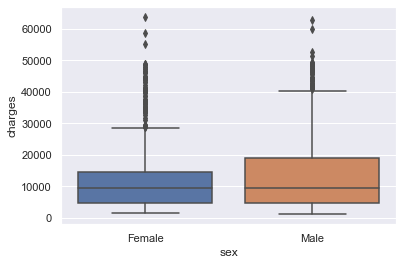

In [30]:
sns.boxplot(x='sex',y='charges',data=insurance_new)

Outliers are more in case of female policy holders

In [58]:
#sns.boxplot(x='sex',y='age',data=insurance_new)

In [59]:
#sns.boxplot(x='sex',y='steps',data=insurance_new)

<AxesSubplot:xlabel='region', ylabel='steps'>

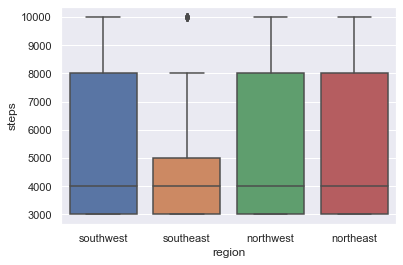

In [33]:
sns.boxplot(x='region',y='steps',data=insurance_new)

Steps count is less in the southeast region

<AxesSubplot:xlabel='region', ylabel='bmi'>

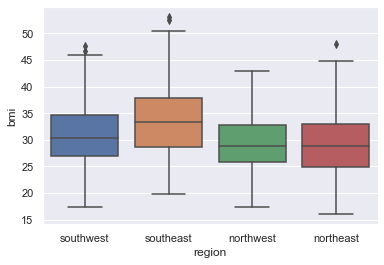

In [34]:
sns.boxplot(x='region',y='bmi',data=insurance_new)

Due to less step count, the BMI index is more in the southeast region as compared to other region

<AxesSubplot:xlabel='region', ylabel='charges'>

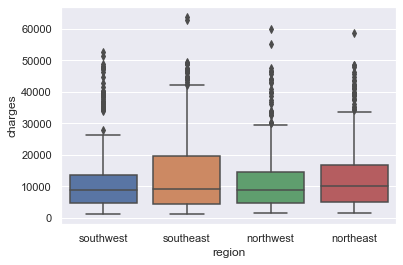

In [35]:
sns.boxplot(x='region',y='charges',data=insurance_new)

Due to high BMI index, southeast policy holders have to pay more charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

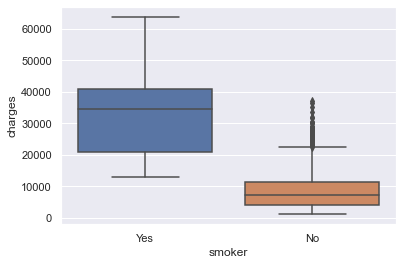

In [60]:
sns.boxplot(x='smoker',y='charges',data=insurance_new)

Policy holder, who is smoker has to pay average charge of 20 to 40k which is far more than the average charge of non-smokers 

<AxesSubplot:xlabel='region', ylabel='charges'>

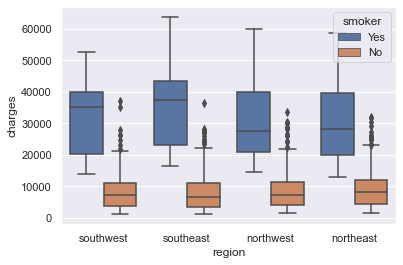

In [61]:
sns.boxplot(x='region',y='charges',hue='smoker',data=insurance_new,)

Average smokers are more in the southeast region, so they have to pay more charges

In [62]:
#sns.boxplot(x=insurance_new.smoker,y=insurance.region)

## Quantile Calculation

In [64]:
insurance_new['charges'].quantile(0.99)

48537.480726

In [65]:
tdf=insurance_new[insurance_new['charges']>=insurance_new['charges'].quantile(0.99)].sort_values(by='charges',ascending=False)

In [71]:
tdf #.sort_values(by='bmi',ascending=False)

,age,sex,bmi,steps,children,smoker,region,charges,claim
543,54,Female,47.410,4010,0,Yes,southeast,63770.42801,Yes
1300,45,Male,30.360,4002,0,Yes,southeast,62592.87309,Yes
1230,52,Male,34.485,4006,3,Yes,northwest,60021.39897,Yes
577,31,Female,38.095,3000,1,Yes,northeast,58571.07448,Yes
819,33,Female,35.530,3004,0,Yes,northwest,55135.40209,Yes
1146,60,Male,32.800,3005,0,Yes,southwest,52590.82939,Yes
34,28,Male,36.400,4000,1,Yes,southwest,51194.55914,Yes
1241,64,Male,36.960,3005,2,Yes,southeast,49577.66240,Yes
1062,59,Male,41.140,4007,1,Yes,southeast,48970.24760,Yes
488,44,Female,38.060,3006,0,Yes,southeast,48885.13561,Yes


In [72]:
tdf.describe()

,age,bmi,steps,children,charges
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,50.285714,38.039643,3433.285714,0.857143,53288.022545
std,12.168235,4.280170,514.568442,1.099450,5648.250303
min,28.000000,30.360000,3000.000000,0.000000,48549.178350
25%,44.250000,35.747500,3004.250000,0.000000,48839.621402
50%,54.000000,37.880000,3007.000000,0.500000,50386.110770
75%,59.750000,40.831250,4005.000000,1.000000,57712.156383
max,64.000000,47.410000,4010.000000,3.000000,63770.428010


In [73]:
tdf.sex.value_counts()

Male      9
Female    5
Name: sex, dtype: int64

In [74]:
tdf.region.value_counts()

southeast    7
southwest    3
northwest    2
northeast    2
Name: region, dtype: int64

In [76]:
tdf.children.value_counts()

0    7
1    4
3    2
2    1
Name: children, dtype: int64

In [78]:
tdf_new=tdf.groupby('sex')

In [79]:
tdf_new.bmi.value_counts()

sex     bmi   
Female  35.530    1
        37.700    1
        38.060    1
        38.095    1
        47.410    1
Male    30.360    1
        32.800    1
        34.485    1
        36.400    1
        36.960    1
        40.565    1
        40.920    1
        41.140    1
        42.130    1
Name: bmi, dtype: int64

    1. Above list shows the 1% of policy holders which pays the higher charges for the insurance
    2. All the policy holders in 1% are smoker 
    3. Most of the policy holders are male with BMI greater than 35
    4. 50% policy holders in the list are from southeast region 
    5. 50% policy holders in the list are having no children 
    6. All policy holders in 1% have filed the claim